# 1.9 Chattahoochee

In [23]:
from datascience import *
import numpy as np
from scipy.stats import t

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

I keep some data frames in CSV format accessible from my website. One of them has recreation locations for the Chatahoochee National Forest.

In [24]:
chat = Table.read_table('http://faculty.ung.edu/rsinn/chattahoochee.csv')
chat.num_rows

132

In [25]:
chat

name,ranger station,type,county,lat deg,lat min,lat sec,lon deg,lon min,lon sec
"PINHOTI #1, HWY 100",80301,TRAILHEAD,CHATTOOGA,34,23,21,-85,21,48
"PINHOTI #1, HWY 136",80301,TRAILHEAD,WALKER,34,39,41,-85,3,30
JOHN'S MOUNTAIN OVERLOOK,80301,OBSERVATION SITE,WALKER,34,37,21,-85,5,51
KEOWN FALLS REC AREA,80301,PICNIC SITE,ALKER,34,36,33,-85,5,28
CHESTNUT MTN SHOOTING RANGE,80301,SHOOTING RANGE,WHITFIELD,34,37,14,-85,2,45
POCKET RECREATIONAL AREA,80301,CAMPGROUND,FLOYD,34,35,9,-85,4,57
HIDDEN CREEK REC. AREA,80301,CAMPGROUND,GORDON,34,30,52,-85,4,27
Cottonwood Patch Area,80307,CAMPGROUND,MURRAY,34,58,56,-84,38,20
SUMAC SHOOTING RANGE,80307,SHOOTING RANGE,GILMER,34,56,26,-84,42,35
HICKEY GAP,80307,CAMPGROUND,MURRAY,34,53,37,-84,40,18


## Exploring category data

### `.group` Method

We have two obvious category variables: 'county' and 'type' of recreation area. While it looks numeric, the 'ranger station' ID number describes only handful of station.

#### Grouping by County

In [26]:
chat.group('county').sort('count',descending = True)

county,count
MURRAY,21
RABUN,21
FANNIN,16
LUMPKIN,12
WHITE,11
GREENE,8
UNION,8
GILMER,6
HABERSHAM,6
TOWNS,4


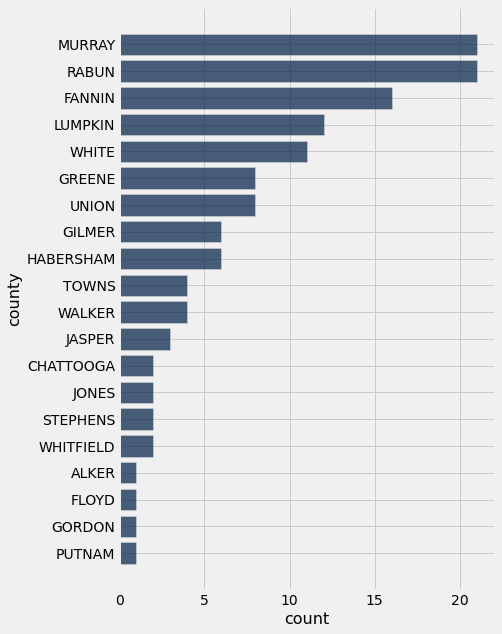

In [27]:
chat.group('county').sort('count',descending = True).barh('county')

#### Recreation areas grouped by type

In [28]:
# Create a grouping table by type of recreation area.



In [29]:
# Create a bar chart showing for the grouping by type of recreation area sorted for most to least.



#### Recreation areas grouped by ranger station

In [30]:
# While the Ranger Station data may look numeric, it's not. 
# There are only a handful of them, so we can treat them like a category variables. 
# Create a grouping table by type of recreation area.



### `.pivot` method

The best data display for two category variables is often a pivot table

In [32]:
chat.pivot('type','county').show()

county,BOATING,CAMPGROUND,DAY USE,HORSE CAMP,INFORMATION,OBSERVATION SITE,PICNIC SITE,SHOOTING RANGE,TRAILHEAD
ALKER,0,0,0,0,0,0,1,0,0
CHATTOOGA,0,0,0,0,0,0,0,0,2
FANNIN,2,5,0,0,0,0,0,0,9
FLOYD,0,1,0,0,0,0,0,0,0
GILMER,0,0,0,0,0,1,1,1,3
GORDON,0,1,0,0,0,0,0,0,0
GREENE,3,1,0,0,0,0,0,1,3
HABERSHAM,1,2,0,0,1,0,2,0,0
JASPER,0,0,2,0,0,0,0,0,1
JONES,0,0,0,0,0,0,2,0,0


Suppose Mina and Jo were interested in hiking and picnic areas. Recall that grouping tables and pivot tables are still tables, so table methods can be used on them. We can select three columns of the pivot table and sort by number of picnic sites.

In [33]:
chat.pivot('type','county').select('county','PICNIC SITE','TRAILHEAD')

county,PICNIC SITE,TRAILHEAD
ALKER,1,0
CHATTOOGA,0,2
FANNIN,0,9
FLOYD,0,0
GILMER,1,3
GORDON,0,0
GREENE,0,3
HABERSHAM,2,0
JASPER,0,1
JONES,2,0


We can use parentheses to allow a "text wrapping" effect so we can add returns and indents for clarity when using multiple methods.

In [34]:
(chat.pivot('type','county')
     .select('county','PICNIC SITE','TRAILHEAD')
     .sort('PICNIC SITE', descending = True))

county,PICNIC SITE,TRAILHEAD
HABERSHAM,2,0
JONES,2,0
RABUN,2,7
ALKER,1,0
GILMER,1,3
LUMPKIN,1,4
MURRAY,1,10
WHITE,1,4
CHATTOOGA,0,2
FANNIN,0,9


If we sort twice, we can find which of the counties with the most picnic areas have the most trailheads. Notice how the two sorts are run by priority.

In [35]:
(chat.pivot('type','county')
     .select('county','PICNIC SITE','TRAILHEAD')
     .sort('TRAILHEAD', descending = True)
     .sort('PICNIC SITE', descending = True))

county,PICNIC SITE,TRAILHEAD
RABUN,2,7
HABERSHAM,2,0
JONES,2,0
MURRAY,1,10
LUMPKIN,1,4
WHITE,1,4
GILMER,1,3
ALKER,1,0
FANNIN,0,9
UNION,0,5


## Cleaning Data

The latitude and longitude columns are in deg-min-sec format rather than decimal format. We can use several approaches to create arrays of latitude and longitude in decimal form:

1. The `.column` method used six times with formula implemented manually
2. A user-defined function using `.apply` method (still need `.column` method)
3. A user-defined function using full power of the `.apply` method


### 1. The `.column` method

We take the 3 latitude columns and perform the arithmetic ourselves.

In [36]:
latd = chat.column('lat deg')
latm = chat.column('lat min')
lats = chat.column('lat sec')

In [37]:
lat = latd + latm / 60 + lats / 3600

In [38]:
chat_lat = chat.with_column('lat', lat).drop('lat deg','lat min','lat sec')

In [39]:
#Complete the work by doing the same steps for longitude



In [41]:
# Create a table called chat_lat_lon that contains two columns "lat" and "lon" which have
# the decimal values for latitude and longitude.

chat_lat_lon = ...

### 2. User-defined functions

In [42]:
def dms_to_dec(d,m,s):
    return d + m / 60 + s / 3600

In [43]:
# Use the function defined above to create two arrays, one for latitudes and one for longitudes 




### 3. User-defined function with `.apply` method

The `.apply` method, if a column is not specified, just works row by row. For this reason, we do not have to use the `.column` method first. We can just feed the function a table with the proper three columns.

In [44]:
def deg_2_dec(my_row):
    d = my_row.item(0)
    m = my_row.item(1)
    s = my_row.item(2)
    return d + m/60 + s/3600

In [45]:
lat = chat.select('lat deg','lat min','lat sec').apply(deg_2_dec)
lat

array([34.38916667, 34.66138889, 34.6225    , 34.60916667, 34.62055556,
       34.58583333, 34.51444444, 34.98222222, 34.94055556, 34.89361111,
       34.82611111, 34.73388889, 34.86277778, 34.83472222, 34.82027778,
       34.82027778, 34.81472222, 34.81      , 34.78611111, 34.93861111,
       34.89888889, 33.15444444, 34.78861111, 33.11944444, 34.9425    ,
       34.95027778, 33.73194444, 34.86222222, 33.72083333, 33.64666667,
       33.56805556, 33.55      , 33.20833333, 34.84555556, 34.88361111,
       34.86888889, 34.7925    , 34.74      , 34.7025    , 34.76388889,
       34.76555556, 34.74194444, 34.70555556, 34.67861111, 34.89638889,
       34.72138889, 34.695     , 34.68      , 34.665     , 34.62888889,
       34.60777778, 34.59666667, 34.58388889, 34.67416667, 34.87611111,
       34.95472222, 34.75194444, 34.81555556, 34.83694444, 34.92333333,
       34.68138889, 33.6475    , 33.24222222, 33.17972222, 34.91972222,
       34.94777778, 34.90027778, 34.88138889, 34.95555556, 34.92

In [46]:
lon = chat.select('lon deg','lon min','lon sec').apply(deg_2_dec)
lon

array([-84.63666667, -84.94166667, -84.9025    , -84.90888889,
       -84.95416667, -84.9175    , -84.92583333, -83.36111111,
       -83.29027778, -83.32833333, -83.41805556, -83.30944444,
       -83.48305556, -83.30361111, -83.44805556, -83.43388889,
       -83.43888889, -83.36083333, -83.37277778, -83.33972222,
       -83.35444444, -82.40222222, -84.87055556, -82.49861111,
       -83.3325    , -83.39527778, -82.70944444, -83.34305556,
       -82.70861111, -82.71      , -82.72777778, -82.69972222,
       -82.60472222, -83.71027778, -83.73222222, -83.75583333,
       -83.76111111, -83.85972222, -83.85055556, -83.92694444,
       -83.93416667, -82.07777778, -82.08222222, -82.00055556,
       -82.09222222, -83.86694444, -83.78972222, -83.99888889,
       -82.0825    , -83.86583333, -83.845     , -83.95472222,
       -83.81555556, -82.02472222, -82.18916667, -82.22055556,
       -82.10361111, -83.69916667, -83.72083333, -83.90583333,
       -82.06166667, -82.85305556, -82.18638889, -82.18

In [47]:
chattahoochee = (chat.select('name','type','county')
                 .with_columns(
                     'lat',lat,
                     'lon',lon))
chattahoochee

name,type,county,lat,lon
"PINHOTI #1, HWY 100",TRAILHEAD,CHATTOOGA,34.3892,-84.6367
"PINHOTI #1, HWY 136",TRAILHEAD,WALKER,34.6614,-84.9417
JOHN'S MOUNTAIN OVERLOOK,OBSERVATION SITE,WALKER,34.6225,-84.9025
KEOWN FALLS REC AREA,PICNIC SITE,ALKER,34.6092,-84.9089
CHESTNUT MTN SHOOTING RANGE,SHOOTING RANGE,WHITFIELD,34.6206,-84.9542
POCKET RECREATIONAL AREA,CAMPGROUND,FLOYD,34.5858,-84.9175
HIDDEN CREEK REC. AREA,CAMPGROUND,GORDON,34.5144,-84.9258
Cottonwood Patch Area,CAMPGROUND,MURRAY,34.9822,-83.3611
SUMAC SHOOTING RANGE,SHOOTING RANGE,GILMER,34.9406,-83.2903
HICKEY GAP,CAMPGROUND,MURRAY,34.8936,-83.3283


## Maps using lat-lon coordinates

In [48]:
Marker.map_table(chattahoochee.select('lat','lon','name'))

In [49]:
Circle.map_table(chattahoochee.select('lat','lon','name'))

### Recreation areas near Dahlonega

#### Miles per degree of latitude
The distance between latitude lines are consistent, or would be if the earth were a sphere. Taking the radius of a spherical earth as 4,000 miles, we can chop the circumference of the earth into 360 equally sized pieces, one for each of the $360^\circ$, using the formula for the circumference of circule based on its radius.

$$C = 2\pi r \approx 25133 \text{ mi}$$

The distance between latitude lines that are one degree apart is approximately 70 miles which a bit of basic geometry will demonstrate.

In [50]:
r = 4000
circumference = 2 * np.pi * r
circumference

25132.741228718343

In [51]:
mile_per_degree_lat = circumference / 360 
mile_per_degree_lat

69.81317007977317

This is why we round to 70 miles per degree of latitude to make life simpler.

#### Miles per degree of longitude

The distance between lines of longitude varies from a maximum at the equator to near-zero at the north or south pole. Within a hudred yards of the north pole, the distance between degrees of longitude would be one or two footsteps. At the equator, assuming the eath is spherical, the distance would the same as for latitude, or about 70 miles.

We can find the radius around the earth at $34.5^\circ$ latitude, a good approximation based on UNG's Dahlonega campus coordinates:

$$(34.5279^\circ N, 83.9844^\circ W)$$

If we call $x$ the new radius, the one specific to the latitude, then:

$$\cos L = \frac{x}{r}$$
 
where 

$$\begin{align*}
L &= \text{ degrees latitude} \\
R &= \text{ radius}
\end{align*}$$

The `numpy` package expects radians, not degrees, so the value for $x$ will be as follows.

In [52]:
x = np.cos(34.5 * np.pi / 180) * r
x

3296.5047544880626

With the new radius $x$, we do the same as before. Determine the circumference and divide it by 360.

In [53]:
x_circumference = 2 * np.pi * x
x_circumference

20712.550238447046

In [54]:
mile_per_degree_long = x_circumference / 360
mile_per_degree_long

57.534861773464016

This means that near Dahlonega, GA, there about 70 miles between each degree of latitude and about 57.5 miles between each degree of longitude. Suppose that we want to find all the recreation areas that are within 30 miles east or west of the UNG Dahlonega campus and within 30 miles north and south.


In [55]:
lat_adj = 30/70
round(lat_adj,2)

0.43

In [56]:
lon_adj = 30 / 57.5
round(lon_adj,2)

0.52

In [57]:
chat_near_dahlonega = (chattahoochee.where('lat',are.between(34.5 - lat_adj,34.5+lat_adj))
                       .where('lon',are.between(-84 - lon_adj, -84+lon_adj)))
chat_near_dahlonega

name,type,county,lat,lon
JACK'S RIVER FIELDS CAMPGROUND,CAMPGROUND,FANNIN,34.8628,-83.4831
LAKE BLUE RIDGE CG,CAMPGROUND,FANNIN,34.8456,-83.7103
LAKEWOOD LANDING,BOATING,FANNIN,34.8836,-83.7322
MORGANTON PT. REC. AREA,CAMPGROUND,FANNIN,34.8689,-83.7558
TOCCOA SANDY BOTTOMS,BOATING,FANNIN,34.7925,-83.7611
DEEP HOLE REC. AREA,CAMPGROUND,FANNIN,34.74,-83.8597
FRANK GOSS REC. AREA,CAMPGROUND,FANNIN,34.7025,-83.8506
MULKY REC. AREA,CAMPGROUND,UNION,34.7639,-83.9269
COOPER CREEK REC. AREA,CAMPGROUND,UNION,34.7656,-83.9342
ROCK CR. DISPERSED SITE,CAMPGROUND,MURRAY,34.7214,-83.8669


In [58]:
Circle.map_table(chat_near_dahlonega.select('lat','lon','name'))

In [59]:
# Create a map of all recreation areas in White County.



In [60]:
# Create a map of all trailheads in Rabun County.



## Using predicates in `.where` methods

What if we want to find all recreation areas within nearby counties? The basic `.where` method only allows us to filter based on one county name at a time, but what if we use the predicate `are.contained_in`? Life becomes much easier.

### Task: create a map of all recreation areas in Lumkin and White counties.

In [61]:
Lumpkin_White = chattahoochee.where('county', are.contained_in ('LUMPKIN WHITE'))

In [65]:
Lumpkin_White.show()

name,type,county,lat,lon
DESOTO FALLS REC. AREA,CAMPGROUND,LUMPKIN,34.7056,-82.0822
WOODY GAP REC. AREA,PICNIC SITE,LUMPKIN,34.6786,-82.0006
CHESTATEE OVERLOOK,OBSERVATION SITE,LUMPKIN,34.68,-83.9989
WATERS CREEK REC. AREA,CAMPGROUND,LUMPKIN,34.665,-82.0825
MONTGOMERY CREEK,DAY USE,LUMPKIN,34.6289,-83.8658
JONES CR. DISPERSED AREA,TRAILHEAD,LUMPKIN,34.6078,-83.845
WHISSENHUNT ORV AREA,TRAILHEAD,LUMPKIN,34.5967,-83.9547
NIMBERWILL DISPERSED AREA,TRAILHEAD,LUMPKIN,34.5839,-83.8156
DOCKERY LAKE REC. AREA,CAMPGROUND,LUMPKIN,34.6742,-82.0247
DICKS CREEK USE AREA (04),CAMPGROUND,LUMPKIN,34.6814,-82.0617


In [64]:
Circle.map_table(Lumpkin_White.select('lat','lon','name'))

In [20]:
chat.where(truth_array)

NameError: name 'truth_array' is not defined

In [ ]:
# Create a map of all Chattahoochee trailheads in Lumpkin, White, Rabun and Union counties.